# Week8 Multicollinearity-PCR 
## 背景描述  
数据集来源：Draper & Smith(1998, P348). Applied Regression Analysis.  
由此我们构造了 13 个观测的 4 个变量，具体请见下表：

## 数据描述
| 变量名 | 变量类型 | 变量取值范围 |
| :----------: | :----------: | :----------: |
| （自变量1）X1 | continuous variable | $\mathbb{R}^+$ |
| （自变量2）X2 | continuous variable | $\mathbb{R}^+$ |
| （自变量3）X3 | continuous variable | $\mathbb{R}^+$ |
| （自变量4）X4 | continuous variable | $\mathbb{R}^+$ |
| （因变量）Y | continuous variable | $\mathbb{R}^+$ |

## 问题
这里使用 $\alpha=0.05$ 的水平
1. 判断所给数据是否具有多重共线性.
2. 若具有多重共线性, 选择适当的主成分.
3. 对降维后的数据进行回归分析.


## 解决方案

**Q1：**  

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from itertools import combinations
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA  # 进行主成分分析

alpha = 0.05
p = 4
n = 13

x = pd.read_csv('Hald\'s.csv')
x.insert(0, 'intercept', np.ones(len(x))) 
data = x.values * 1.0
df = pd.DataFrame(data)
print(df.head())

# 对数据进行分割
X = data[:,0:p+1]
Y = data[:,-1]



     0     1     2     3     4      5
0  1.0   7.0  26.0   6.0  60.0   78.5
1  1.0   1.0  29.0  15.0  52.0   74.3
2  1.0  11.0  56.0   8.0  20.0  104.3
3  1.0  11.0  31.0   8.0  47.0   87.6
4  1.0   7.0  52.0   6.0  33.0   95.9


In [2]:
# Do the multiple linear regression——对原始数据
# OLS（endog,exog=None,missing='none',hasconst=None) (endog:因变量，exog=自变量）
model = sm.OLS(Y, X).fit()
beta = model.params
model.summary()

D:\Program_Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     111.5
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           4.76e-07
Time:                        17:25:16   Log-Likelihood:                -26.918
No. Observations:                  13   AIC:                             63.84
Df Residuals:                       8   BIC:                             66.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.4054     70.071      0.891      0.399     -99.179     223.989
x1             1.5511      0.745      2.083      0.071      -0.166       3.269
x2             0.5102      0.724      0.705      0.501      -1.159       2.179
x3             0.1019      0.755      0.135      0.896      -1.638       1.842
x4            -0.1441      0.709     -0.203      0.844      -1.779       1.491
==============================================================================
Omnibus:                        0.165   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.320
Skew:                           0.201   Prob(JB):                        0.852
Kurtosis:                       2.345   Cond. No.                     6.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**数据预处理：**

In [3]:
# 对数据进行标准化
# 自变量 X 的均值
X_mean = []
for i in range(p):
    X_mean.append(np.mean(X[:, i+1])) 

# 自变量 X 的标准差
X_L = []
for i in range(p):
    X_L.append(sum((X[:, i+1] - X_mean[i]) ** 2))  

# 对自变量 X 标准化(截距项不用标准化)
X_std = X * 1.0
X_std[:,1:p+1] = (X[:,1:p+1] - X_mean) / np.sqrt(X_L)

# 对因变量 Y 标准化
Y_std = (Y - np.mean(Y)) / np.sqrt(sum((Y - np.mean(Y))**2))

df_std = pd.DataFrame(X_std)
df_std['Y'] = Y_std
print(df_std.head())

     0         1         2         3         4         Y
0  1.0 -0.022650 -0.410983 -0.260016  0.517395 -0.324738
1  1.0 -0.317096 -0.355329  0.145609  0.379423 -0.405332
2  1.0  0.173648  0.145557 -0.169877 -0.172465  0.170340
3  1.0  0.173648 -0.318227 -0.169877  0.293191 -0.150118
4  1.0 -0.022650  0.071351 -0.260016  0.051740  0.009152


**做多元线性回归分析:**

In [4]:
# Do the multiple linear regression——对标准化后的数据
model_std = sm.OLS(Y_std, X_std).fit()
beta_std = model_std.params
model_std.summary()

D:\Program_Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     111.5
Date:                Tue, 20 Apr 2021   Prob (F-statistic):           4.76e-07
Time:                        17:25:19   Log-Likelihood:                 24.476
No. Observations:                  13   AIC:                            -38.95
Df Residuals:                       8   BIC:                            -36.13
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.898e-17      0.013   4.53e-15      1.000      -0.030       0.030
x1             0.6065      0.291      2.083      0.071      -0.065       1.278
x2             0.5277      0.749      0.705      0.501      -1.199       2.254
x3             0.0434      0.321      0.135      0.896      -0.698       0.784
x4            -0.1603      0.789     -0.203      0.844      -1.980       1.659
==============================================================================
Omnibus:                        0.165   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.320
Skew:                           0.201   Prob(JB):                        0.852
Kurtosis:                       2.345   Cond. No.                         89.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**求 $(X^*)^{'}(X^*)$ 矩阵的特征值和特征向量:**

In [5]:
# (X*)'(X*) 矩阵等价于原始矩阵 X 样本相关矩阵
R = df.corr()
R = R.iloc[1:-1,1:-1]

# 求 (X*)'(X*) 矩阵，结果与样本相关矩阵一致
# R1 = np.dot(X_std.T,X_std) 
# R1 = pd.DataFrame(R1[1:,1:])

R

,1,2,3,4
1,1.000000,0.228579,-0.824134,-0.245445
2,0.228579,1.000000,-0.139242,-0.972955
3,-0.824134,-0.139242,1.000000,0.029537
4,-0.245445,-0.972955,0.029537,1.000000


In [20]:
# 求特征值 & 特征向量
W, V = np.linalg.eig(R)
W_diag = np.diag(W)
V = V.T # 这里需要转置

print('特征值:', W)
print(W_diag)
print(sum(W)) # 验证特征值求和值为 p
VV = np.dot(V,V.T)
VV = pd.DataFrame(VV)
print(VV) # 验证矩阵 V'V 结果为单位阵


特征值: [2.23570403e+00 1.57606607e+00 1.86606149e-01 1.62374573e-03]
[[2.23570403e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.57606607e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.86606149e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.62374573e-03]]
3.9999999999999942
              0             1             2             3
0  1.000000e+00 -2.220446e-16  6.938894e-17 -4.458239e-16
1 -2.220446e-16  1.000000e+00 -7.910339e-16 -3.885781e-16
2  6.938894e-17 -7.910339e-16  1.000000e+00  1.221245e-15
3 -4.458239e-16 -3.885781e-16  1.221245e-15  1.000000e+00


**判断 X 矩阵是否具有多重共线性:**

In [33]:
# 定义"判断多重共线性"的函数
# 参数: (X_list: 设计矩阵 X, thres_vif: VIF 方法判断多重共线性的阈值, thres_kappa: 特征值方法判断多重共线性的阈值)
def judge_col(X_list, thres_vif, thres_kappa): 
    var_num = X_list.shape[1]
    print('VIF方法判断结果(阈值为 %d): '% thres_vif)
    vif = [variance_inflation_factor(X_list, i) for i in range(var_num)]
    for i in range(var_num):
        if vif[i] >= thres_vif:
            print('设计矩阵 X 存在多重共线性.')
            break
        elif i == var_num-1:
            print('设计矩阵 X 不存在多重共线性.')

    print('\n特征值判定法判断结果(阈值为 %d): '% thres_kappa)
    kappa = []
    for i in range(var_num):
        kappa.append(np.sqrt(max(W) / W[i]))
    if np.max(kappa) >= thres_kappa:
        print('设计矩阵 X 存在多重共线性，其中kappa值为：%.4f'% np.max(kappa))
    else:
        print('设计矩阵 X 不存在多重共线性，其中kappa值为：%.4f'% np.max(kappa))

# 判断多重共线性
judge_col(X_std[:,1:p+1], 5, 10)

VIF方法判断结果(阈值为 5): 
设计矩阵 X 存在多重共线性.

特征值判定法判断结果(阈值为 10): 
设计矩阵 X 存在多重共线性，其中kappa值为：37.1063


**Q2:**

**构造主成分矩阵 Z:**

In [21]:
# 构造主成分矩阵 Z
Z = np.dot(X_std[:,1:p+1],V.T)
ZZ = np.dot(Z.T,Z)
ZZ = pd.DataFrame(ZZ)
print(ZZ)  # 验证主成分矩阵 Z 各列之间正交，主对角线元素对应的是特征值

              0             1             2             3
0  2.235704e+00 -3.474877e-16 -8.433381e-16 -3.743351e-16
1 -3.474877e-16  1.576066e+00 -6.590942e-16 -8.679917e-17
2 -8.433381e-16 -6.590942e-16  1.866061e-01  1.216110e-16
3 -3.743351e-16 -8.679917e-17  1.216110e-16  1.623746e-03


In [9]:
D = np.linalg.det(R)
print('(X*)\'X*的行列式: ', D)

(X*)'X*的行列式:  0.001067659340641059


由于 $|(X^*)^{'}(X^*)| \approx 0$, 则存在一个 k, 使得 $\lambda_{k+1},\cdots,\lambda_p$ 均近似为 0. 因此 $\mathbf{z}_{k+1},\cdots,\mathbf{z}_p$ 近似为 $\mathbf{0}$ 

**选主成分:**

In [10]:
# 对特征值按降序排序
W_srt = W.tolist()
W_srt.sort(reverse=True)
W_idx = np.argsort(-W) # 返回的是元素值降序排序后的索引值的数组
print('特征值为: ', W_srt)
print('排序后特征值对应的原索引值: ', W_idx)

特征值为:  [2.2357040348291717, 1.5760660703083897, 0.1866061491286729, 0.0016237457337601878]
排序后特征值对应的原索引值:  [0 1 2 3]


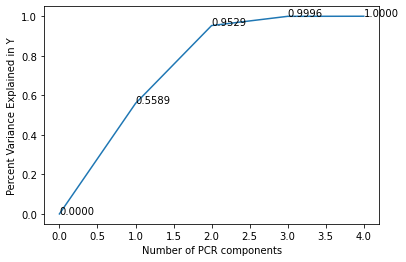

In [11]:
# 绘制主成分的累计贡献率(响应变量中解释的方差百分比)与组件数量的碎石图
comp = range(0, p+1)
# 主成分的累计贡献率(计算方差百分比)
summ = 0
W_sum = [0]
for i in range(p):
    summ += W_srt[i]
    W_sum.append(summ / p)
plt.plot(comp, W_sum)
plt.xlabel('Number of PCR components')
plt.ylabel('Percent Variance Explained in Y')
for i,j in zip(comp, W_sum):
    plt.text(i, j, '%.4f' % float(j))

In [12]:
# 保留累计贡献率比重大的主成分
c_pc = 0.8
cnt = True
thres = p * c_pc
while cnt:
    W_sum = 0
    W_summ = W_srt[0] 
    for i in range(p-1):
        k1 = i + 1 
        W_sum += W_srt[i]
        W_summ += W_srt[i+1]
        # print(i,W_sum,W_summ,thres)
        if (W_sum < thres) & (W_summ >= thres):
            cnt = False
            break
        elif i == p - 2:
            cnt = False
            k1 = i + 1
            break
k1 = k1 + 1
print('保留变量个数为: ', k1) 
        

保留变量个数为:  2


In [13]:
# 删除特征值接近于零的主成分
for i in range(p):
    if W_srt[i] < 1:
        k2 = i
        break
print('保留变量个数为: ', k2)   

保留变量个数为:  2


In [14]:
# 均方误差确定 k
mse = 0
for i in range(p):
    k3 = p
    mse += 1 / W_srt[i]
    print(5 * (i + 1), mse)
    if mse > 5 * (i + 1):
        k3 = i
        break
    elif i == p-1:
        k3 = p
        break
print('保留变量个数 <=', k3) 

5 0.44728639588307995
10 1.081777562744079
15 6.440657774727111
20 622.3006284637653
保留变量个数 <= 3


综上，我们选择保留变量的个数为 2.

**Q3:**

In [25]:
# 矩阵拆分
k = k1
list_var1 = W_idx[0:k] # 记录降序排序后的前 k 个主成分
list_var2 = W_idx[k:]
# list_var1 = [0,2] 
# list_var2 = [1,3]

Z_1 = Z[:,list_var1]
Z_2 = Z[:,list_var2]

W_diag_1 = np.diag(W_diag[list_var1,list_var1])
W_diag_2 = np.diag(W_diag[list_var2,list_var2])

# 按行进行拆分
V_1 = V[list_var1,:]
V_2 = V[list_var2,:]

# α的估计
# alpha_hat = np.linalg.inv(W_diag) @ Z.T @ Y_std
alpha1_hat = np.linalg.inv(W_diag_1) @ Z_1.T @ Y_std
print('系数:', alpha1_hat)

# 主成分估计
beta_pc = np.dot(V_1.T,alpha1_hat)
print(beta_pc)
print(V_1.T @ V_1 @ beta_std[1:]) # 验证PPT 99页的性质1

系数: [ 0.65695805 -0.00830863]
[ 0.30845366  0.3738783  -0.25385872 -0.36371695]
[ 0.30845366  0.3738783  -0.25385872 -0.36371695]


In [26]:
# 使用拆分后的数据用线性回归模型进行建模
X_pc = Z_1
model_pc = sm.OLS(Y_std, X_pc).fit()
model_pc.summary()

D:\Program_Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              151.8
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    9.79e-09
Time:                        18:25:20   Log-Likelihood:                          20.021
No. Observations:                  13   AIC:                                     -36.04
Df Residuals:                      11   BIC:                                     -34.91
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6570      0.038     17.421      0.000       0.574       0.740
x2            -0.0083      0.045     -0.185      0.857      -0.107       0.091
==============================================================================
Omnibus:                        2.024   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                1.334
Skew:                           0.563   Prob(JB):                        0.513
Kurtosis:                       1.907   Cond. No.                         1.19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
# 判断多重共线性【k > 1 时才可能存在多重共线性问题】
judge_col(X_pc, thres_vif=5, thres_kappa=10)


VIF方法判断结果(阈值为 5): 
设计矩阵 X 不存在多重共线性.

特征值判定法判断结果(阈值为 10): 
设计矩阵 X 不存在多重共线性，其中kappa值为：1.1910


In [30]:
# 创建pca模型
pca = PCA(n_components=k1)

# 对模型进行训练
X_pc_ = X_std * 1.0
pca.fit(X_pc_)

# 返回降维后数据
X_pc_ = pca.transform(X_pc_)

# 使用返回后的数据用线性回归模型进行建模
model_pc_ = sm.OLS(Y_std, X_pc_).fit()
model_pc_.summary()

D:\Program_Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                              151.8
Date:                Tue, 20 Apr 2021   Prob (F-statistic):                    9.79e-09
Time:                        18:44:07   Log-Likelihood:                          20.021
No. Observations:                  13   AIC:                                     -36.04
Df Residuals:                      11   BIC:                                     -34.91
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.6570      0.038    -17.421      0.000      -0.740      -0.574
x2             0.0083      0.045      0.185      0.857      -0.091       0.107
==============================================================================
Omnibus:                        2.024   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.363   Jarque-Bera (JB):                1.334
Skew:                           0.563   Prob(JB):                        0.513
Kurtosis:                       1.907   Cond. No.                         1.19
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# 判断多重共线性【k 值大于 1 时才可能存在多重共线性问题】
judge_col(X_pc_, thres_vif=5, thres_kappa=10)


VIF方法判断结果(阈值为 5): 
设计矩阵 X 不存在多重共线性.

特征值判定法判断结果(阈值为 10): 
设计矩阵 X 不存在多重共线性，其中kappa值为：1.1910


## 第八周练习题
数据集：Project8.csv(内附文档)  
统计方法：Multicollinearity-PCR  
软件：Jupyter Notebook  
作业发到钉钉群  
Deadline：下周一晚上10：00之前交  
注：要有完整的解题过程，不能只有代码